# HSM Lupus patient cohort metataxonomics analysis

In [1]:
# packages
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

## Import data

In [2]:
data = "data/16S_IGC_2021 - Metadata March 2022.csv"

In [3]:
df = pd.read_csv(data,sep=',',na_values="Missing").set_index('sample-id')
df = df.drop(columns="patient codes")
df

,condition,gender,ethnicity,age_2_categories,age_5_categories,age_diagnosis_2_categories,age_diagnosis_5_categories,time_since_diagnosis_2_categories,time_since_diagnosis_5_categories,lupus_nephritis,...,mediterranean_diet_3_categories,bristol_scale,Fasting,Sleep,fat_mass_bodpod,fat_mass_BIA,waist_circumference,BMI,waist_to_hip,hip_to_hight
sample-id,,,,,,,,,,,,,,,,,,,,,
C1,Sick,0,1,1,2,1,2,1,1,0,...,2,3,2,2,5,4,1,1,NaN,1
C11,Healthy,0,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
C12,Healthy,1,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,3,4,1,1,3,3,1,1,1,1
C13,Healthy,0,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,2,4,1,1,4,4,1,0,1,1
C14,Healthy,0,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,2,4,1,2,2,3,1,1,1,1
C15,Healthy,0,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,2,4,2,1,2,3,1,1,1,1
C2,Healthy,0,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,2,4,1,1,4,4,1,1,NaN,1
C3,Healthy,0,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,2,4,1,1,2,1,2,2,1,2
C5,Healthy,0,1,2,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,...,3,4,2,2,3,3,1,1,1,1


In [4]:
for column in df.columns:
    df[column] = df[column].astype('category')

In [5]:
df.dtypes

condition                            category
gender                               category
ethnicity                            category
age_2_categories                     category
age_5_categories                     category
age_diagnosis_2_categories           category
age_diagnosis_5_categories           category
time_since_diagnosis_2_categories    category
time_since_diagnosis_5_categories    category
lupus_nephritis                      category
SLEDAI-2K                            category
GLP-1                                category
sCD14                                category
IFABP                                category
Zonulin_05                           category
Zonulin_1                            category
physical_activity_IPAQ               category
sitting_time_2_categories            category
sitting_time_4_categories            category
mediterranean_diet_2_categories      category
mediterranean_diet_3_categories      category
bristol_scale                     

In [6]:
factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((len(df.columns.values),len(df.columns.values))) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience

p_values = np.array(p_values).reshape((len(df.columns.values),len(df.columns.values))) # shape it as a matrix
p_values = pd.DataFrame(p_values, index=df.columns.values, columns=df.columns.values) # then a df for convenience

In [7]:
p_values

,condition,gender,ethnicity,age_2_categories,age_5_categories,age_diagnosis_2_categories,age_diagnosis_5_categories,time_since_diagnosis_2_categories,time_since_diagnosis_5_categories,lupus_nephritis,...,mediterranean_diet_3_categories,bristol_scale,Fasting,Sleep,fat_mass_bodpod,fat_mass_BIA,waist_circumference,BMI,waist_to_hip,hip_to_hight
condition,0.000000e+00,3.962205e-09,3.529615e-07,3.675255e-10,4.781526e-09,3.572866e-15,4.888864e-14,2.048504e-16,2.922561e-13,7.882287e-17,...,5.651811e-10,4.380869e-08,5.425485e-09,5.190516e-10,9.973511e-07,3.503360e-07,4.396078e-09,1.865501e-08,3.403825e-07,5.516120e-10
gender,3.962205e-09,0.000000e+00,1.286273e-06,3.369843e-09,3.660952e-08,2.863624e-07,1.357627e-06,5.787310e-08,1.106334e-06,7.206053e-08,...,2.646180e-08,1.142769e-07,3.273096e-09,3.772647e-09,5.017417e-06,4.253499e-07,1.438239e-08,2.094206e-07,1.911621e-06,6.067174e-09
ethnicity,3.529615e-07,1.286273e-06,0.000000e+00,1.698458e-07,5.189097e-06,2.127821e-05,2.922408e-05,1.011284e-06,1.398052e-06,2.557360e-06,...,7.327345e-07,2.449317e-04,2.086671e-07,7.449029e-07,1.381566e-05,5.882560e-06,2.574304e-06,2.223477e-04,4.579289e-05,4.051458e-07
age_2_categories,3.675255e-10,3.369843e-09,1.698458e-07,0.000000e+00,3.029976e-17,1.276899e-12,1.455637e-11,7.329397e-11,2.238326e-09,6.415446e-09,...,5.447600e-09,9.959624e-06,9.882228e-10,9.730596e-10,5.057902e-06,1.699401e-07,5.176926e-08,3.028808e-07,1.695920e-06,6.280839e-09
age_5_categories,4.781526e-09,3.660952e-08,5.189097e-06,3.029976e-17,0.000000e+00,4.518933e-11,9.439182e-11,1.760011e-10,2.178520e-09,1.348380e-07,...,3.807613e-09,2.370777e-04,9.720652e-09,1.142986e-08,3.350763e-05,1.785782e-06,3.081284e-07,1.401304e-06,1.695920e-06,6.890282e-08
age_diagnosis_2_categories,3.572866e-15,2.863624e-07,2.127821e-05,1.276899e-12,4.518933e-11,0.000000e+00,6.180224e-20,1.200320e-14,6.979200e-12,1.536904e-13,...,5.044917e-09,5.474221e-07,2.029255e-07,4.041467e-08,5.752120e-05,2.287813e-06,4.771130e-07,4.793523e-06,7.987332e-06,6.437411e-08
age_diagnosis_5_categories,4.888864e-14,1.357627e-06,2.922408e-05,1.455637e-11,9.439182e-11,6.180224e-20,0.000000e+00,3.362410e-13,2.935682e-10,3.210882e-12,...,1.048573e-08,5.705015e-06,1.389835e-06,3.143705e-07,6.778681e-05,3.202460e-05,6.992694e-07,1.407705e-05,3.854118e-05,4.700883e-07
time_since_diagnosis_2_categories,2.048504e-16,5.787310e-08,1.011284e-06,7.329397e-11,1.760011e-10,1.200320e-14,3.362410e-13,0.000000e+00,8.230545e-19,1.029865e-14,...,1.747368e-09,5.415556e-07,3.807107e-08,1.198578e-08,2.552831e-06,3.391371e-06,1.345440e-07,1.364056e-06,4.748207e-06,8.577941e-09
time_since_diagnosis_5_categories,2.922561e-13,1.106334e-06,1.398052e-06,2.238326e-09,2.178520e-09,6.979200e-12,2.935682e-10,8.230545e-19,0.000000e+00,3.097243e-11,...,1.446095e-07,1.792565e-05,4.726401e-06,6.609776e-07,1.764986e-06,1.698973e-05,8.353030e-06,8.760058e-05,4.806720e-05,1.015052e-06
lupus_nephritis,7.882287e-17,7.206053e-08,2.557360e-06,6.415446e-09,1.348380e-07,1.536904e-13,3.210882e-12,1.029865e-14,3.097243e-11,0.000000e+00,...,2.177135e-08,5.555509e-06,5.697448e-08,1.208090e-08,6.556958e-06,6.999113e-07,7.049406e-08,4.514605e-07,4.433297e-06,8.468468e-09


In [8]:
lower_triangle_mask = np.triu(np.ones(p_values.shape)).astype(np.bool)
cor_mat_lower = p_values.mask(lower_triangle_mask)


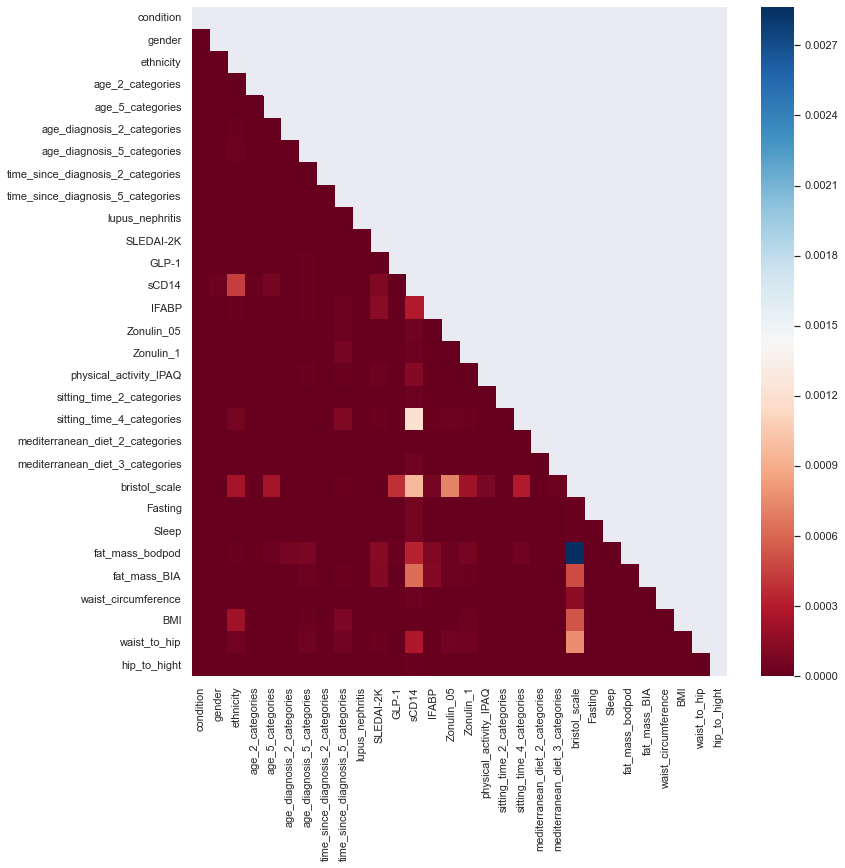

In [11]:
plt.figure(figsize = (12,12))
sns.heatmap(cor_mat_lower, 
            annot=False,     # <-- write the numbers on the squares
            cmap='RdBu'); # <-- use a "red into blue, reversed" colormap 

In [12]:
lower_triangle_mask = np.triu(np.ones(chi2.shape)).astype(np.bool)
cor_mat_lower = chi2.mask(lower_triangle_mask)


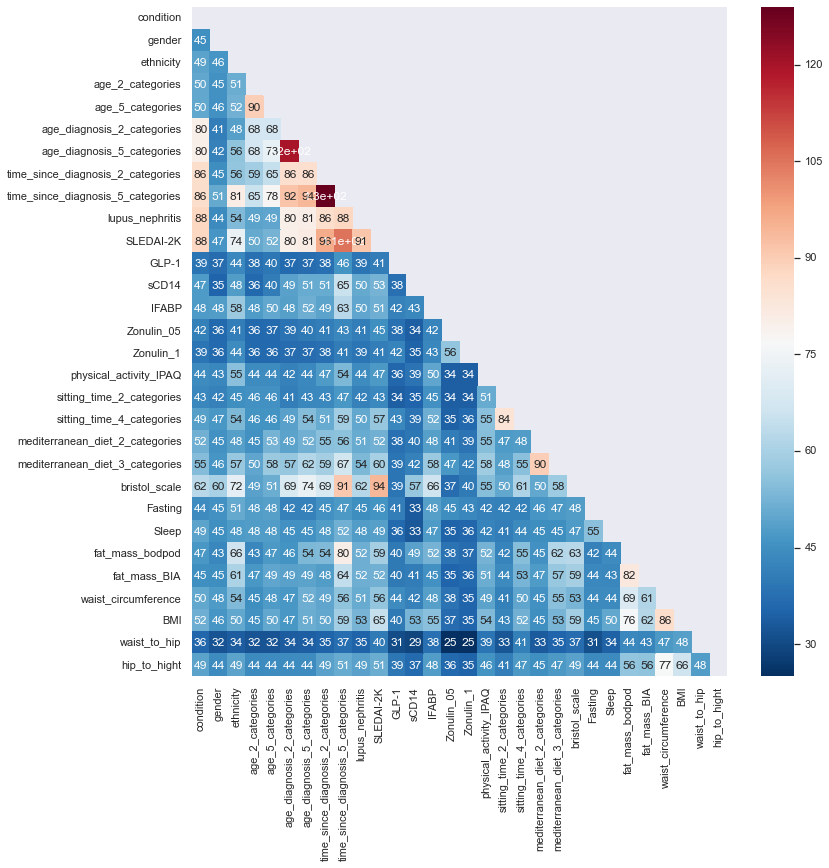

In [13]:
plt.figure(figsize = (12,12))
sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap 